# Cleaning

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
#Import data
data = pd.read_csv("StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#Rename columns to ease data processing
data = data.rename(columns = {'race/ethnicity': 'race',
                             'parental level of education': 'par_edu',
                             'test preparation course': 'test_prep',
                             'math score': 'math',
                             'reading score': 'reading',
                             'writing score': 'writing'})
data.columns

Index(['gender', 'race', 'par_edu', 'lunch', 'test_prep', 'math', 'reading',
       'writing'],
      dtype='object')

In [4]:
#Exploration summary
def exploration(df):
    explore = pd.DataFrame(df.dtypes).rename(columns = {0:'type'})
    explore['is_na'] = df.isna().sum().values
    explore['is_na_prop'] = explore['is_na']/df.shape[0]
    explore['n_unique'] = df.nunique().values
    print('Number of rows = {}, Number of columns = {}'.format(df.shape[0], df.shape[1]))
    return explore

exploration(data)

Number of rows = 1000, Number of columns = 8


,type,is_na,is_na_prop,n_unique
gender,object,0,0.0,2
race,object,0,0.0,5
par_edu,object,0,0.0,6
lunch,object,0,0.0,2
test_prep,object,0,0.0,2
math,int64,0,0.0,81
reading,int64,0,0.0,72
writing,int64,0,0.0,77


# Exploration

In [16]:
red = '#ea9999ff'

,math,reading,writing,average
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770580
std,15.16308,14.600192,15.195657,14.257311
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.330000
50%,66.00000,70.000000,69.000000,68.330000
75%,77.00000,79.000000,79.000000,77.670000
max,100.00000,100.000000,100.000000,100.000000


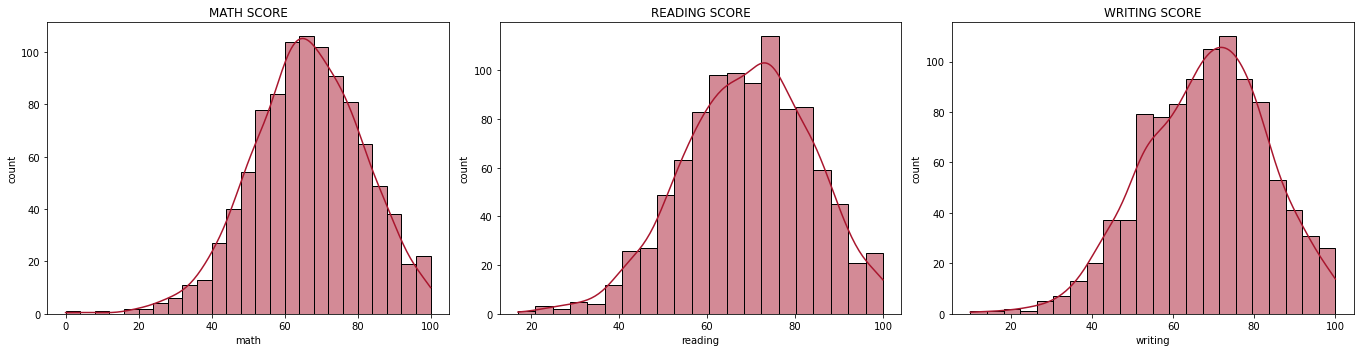

In [32]:
# Displaying scores distribution and summary statistics
display(data.describe())

numcol = ['math', 'reading', 'writing']
bins = [10,10,10]
plt.figure(figsize = (19,5))

for i, binz,j in zip(numcol, bins, range(1,4)):
    plt.subplot(1,3,j)
    sns.histplot(data[i], kde = True, color = '#A9162E')
    plt.ylabel('count')
    plt.title(str(i).upper() + ' SCORE')
    
plt.tight_layout()

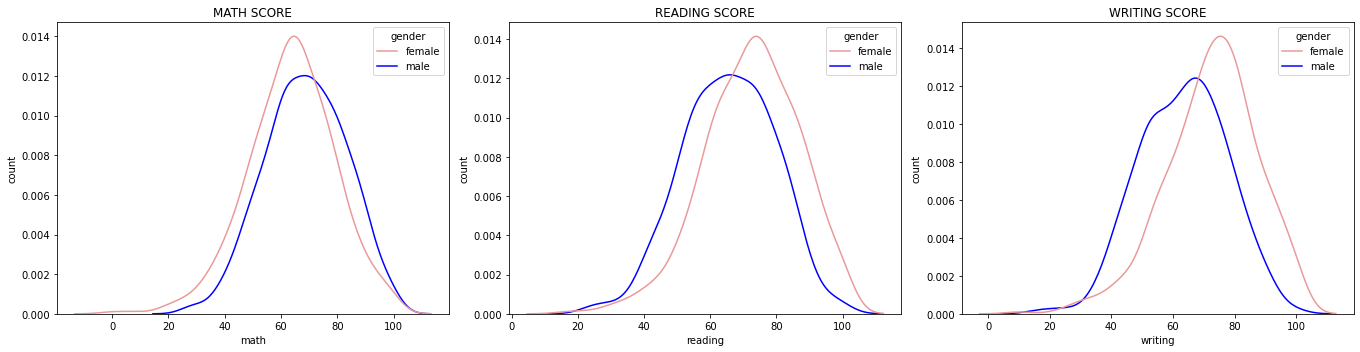

In [21]:
# Displaying scores distribution by gender

numcol = ['math', 'reading', 'writing']
bins = [10,10,10]
plt.figure(figsize = (19,5))

for i, binz,j in zip(numcol, bins, range(1,4)):
    plt.subplot(1,3,j)
    sns.kdeplot(data = data, x = i, hue = 'gender', palette = [red, 'blue'])
    plt.ylabel('count')
    plt.title(str(i).upper() + ' SCORE')
    
plt.tight_layout()

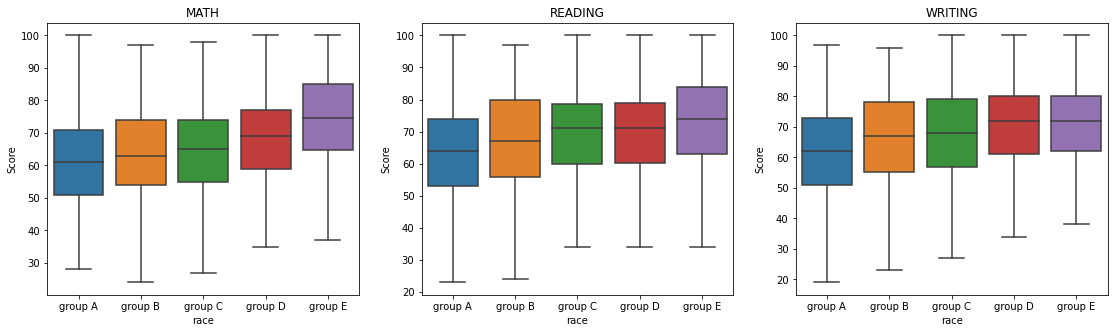

In [8]:
#Boxplot comparison for scores by race or ethnicities group

order_race = ['group A', 'group B', 'group C', 'group D', 'group E']

plt.figure(figsize = (19,5))
for i,j in zip(numcol, range(1,4)):
    plt.subplot(1,3,j)
    sns.boxplot(y = data[i], x=data.race, order = order_race, showfliers = False)
    plt.title(str(i).upper())
    plt.ylabel('Score')

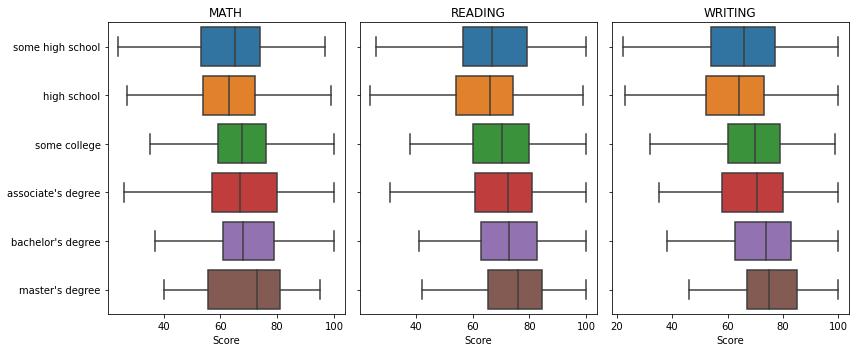

In [9]:
#Boxplot comparison for scores by parent latest education

order_edu = ['some high school','high school', 'some college', "associate's degree", "bachelor's degree", 
             "master's degree"]
fig, ax = plt.subplots(1,3, figsize = (12,5), sharey = True)
for i, j in zip(numcol, range(0,3)):
    sns.boxplot(x= data[i], y = data.par_edu, ax = ax[j], showfliers = False, order = order_edu)
    ax[j].set_ylabel("")
    ax[j].set_xlabel("Score")
    ax[j].set_title(str(i).upper())
fig.tight_layout()

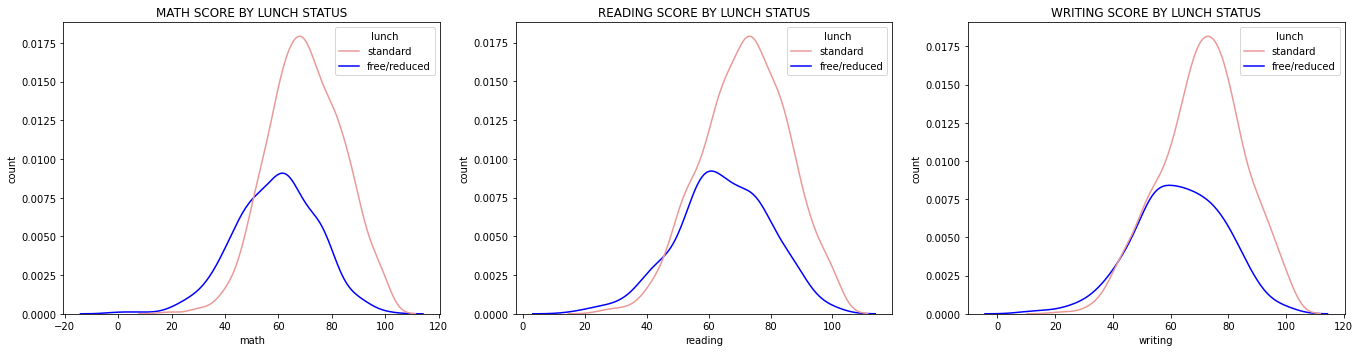

In [24]:
#Score distribution by lunch status

plt.figure(figsize = (19,5))

for i, j in zip(numcol,  range(1,4)):
    plt.subplot(1,3,j)
    sns.kdeplot(data = data, x = i, hue = 'lunch', palette = [red, 'blue'])
    plt.ylabel('count')
    plt.title(str(i).upper() + ' SCORE BY LUNCH STATUS')
    
plt.tight_layout()

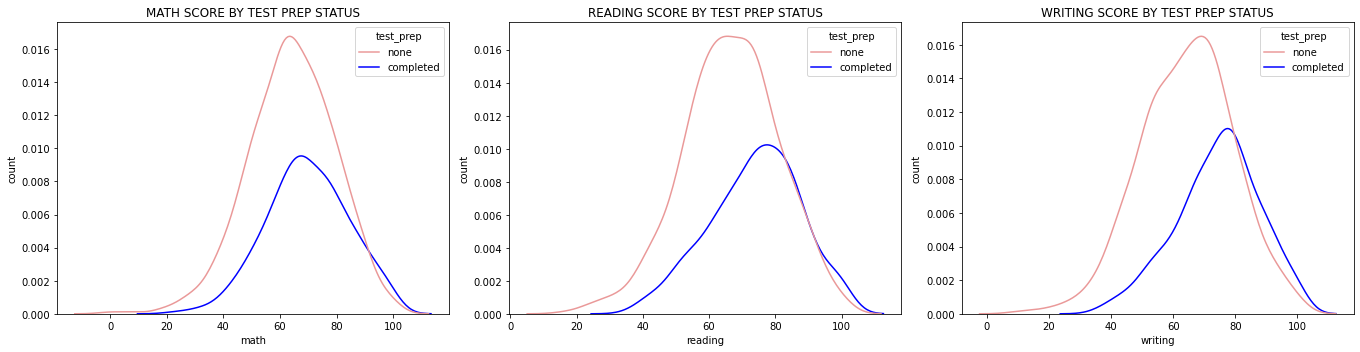

In [25]:
#Score distribution by test preparation status
plt.figure(figsize = (19,5))

for i, j in zip(numcol, range(1,4)):
    plt.subplot(1,3,j)
    sns.kdeplot(data = data, x = i, hue = 'test_prep',palette = [red, 'blue'])
    plt.ylabel('count')
    plt.title(str(i).upper() + ' SCORE BY TEST PREP STATUS')
    
plt.tight_layout()

## Correlation

In [12]:
#Making a table copy for correlation
df = data.copy()
df.head()

,gender,race,par_edu,lunch,test_prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
# Encoding variables for correlation
df.gender = df.gender.map({'female':0, 'male': 1})
df.race = df.race.map({'group A':1, 'group B':2, 'group C':3, 'group D':4, 'group E':5})
df.par_edu = df.par_edu.map({'some high school':1,'high school':2, 'some college':3, 
                             "associate's degree":4, "bachelor's degree":5, 
                             "master's degree":6})
df.lunch = df.lunch.map({"free/reduced": 1, 'standard': 0})
df.test_prep = df.test_prep.map({'completed': 1, 'none':0})
df.head()

,gender,race,par_edu,lunch,test_prep,math,reading,writing
0,0,2,5,0,0,72,72,74
1,0,3,3,0,1,69,90,88
2,0,2,6,0,0,90,95,93
3,1,1,4,1,0,47,57,44
4,1,3,3,0,0,76,78,75


<AxesSubplot:>

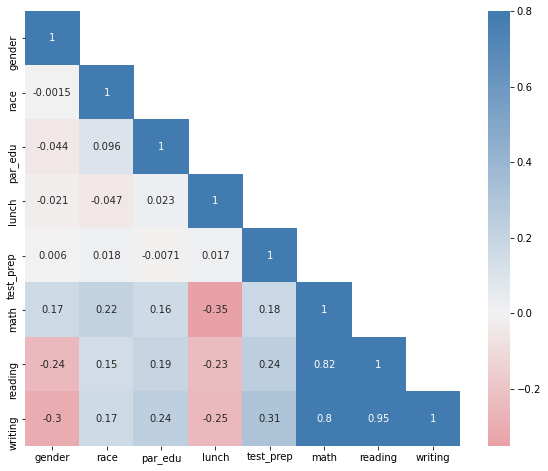

In [31]:
#Correlation visualization

plt.figure(figsize = (10,8))
cmap = sns.diverging_palette(10, 245, as_cmap=True)
corr_dat = df[num_tar].corr()
mask[np.tril_indices_from(mask)] = False

sns.heatmap(corr_dat, mask=mask, vmax=.8, square=True, annot=True, cmap=cmap, center = 0.00)